# Baseline model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
from hms.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer, DropoutLayer, BatchNormalizationLayer
from hms.errors import CrossEntropyError, CrossEntropySoftmaxError, SumOfSquaredDiffsError, L1Error, L2Error
from hms.models import SingleLayerModel, MultipleLayerModel
from hms.initialisers import UniformInit, GlorotUniformInit, ConstantInit
from hms.learning_rules import GradientDescentLearningRule, AdamLearningRule
from hms.data_providers import HMS300dDataProvider
from hms.optimisers import Optimiser
from hms.penalties import L1Penalty, L2Penalty
import seaborn as sns;

%matplotlib inline
plt.style.use('ggplot')

In [3]:
# Seed a random number generator
seed = 6102016 
rng = np.random.RandomState(seed)

# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = HMS300dDataProvider('train', 'extro', 'Wiki', rng=rng)
valid_data = HMS300dDataProvider('validation', 'extro', 'Wiki', rng=rng)
input_dim, output_dim = 300, 6

In [4]:
batch_size = 100  # number of data points in a batch
init_scale = 0.01  # scale for random parameter initialisation
learning_rate = 0.001  # learning rate for gradient descent
num_epochs = 30  # number of training epochs to perform
stats_interval = 1  # epoch interval between recording and printing stats
hidden_dim = 150
weight_penalty = L2Penalty(1e-5)

rng.seed(seed)
train_data.reset()
valid_data.reset()

train_data.batch_size = batch_size 
valid_data.batch_size = batch_size

weights_init = GlorotUniformInit(rng=rng, gain=2.**0.5)
biases_init = ConstantInit(0.)


model = MultipleLayerModel([
    AffineLayer(input_dim, hidden_dim, weights_init, biases_init, weight_penalty),
    ReluLayer(),
    AffineLayer(hidden_dim, output_dim, weights_init, biases_init, weight_penalty),
])

error = L2Error()
learning_rule = AdamLearningRule(learning_rate=learning_rate)

optimiser_300d = Optimiser(
        model, error, learning_rule, train_data, valid_data)

stats_300d, keys_300d, run_time_300d = optimiser_300d.train(num_epochs=num_epochs, stats_interval=stats_interval)

Epoch Progress:  90%|████████▉ | 4366/4868 [00:12<00:01, 348.20it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:14<00:00, 343.26it/s]Epoch 1: 14.2s to complete
    error(train)=3.79e+00, error(valid)=8.16e+00
Epoch Progress:  82%|████████▏ | 3984/4868 [00:10<00:02, 368.40it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:13<00:00, 364.38it/s]Epoch 2: 13.4s to complete
    error(train)=3.56e+00, error(valid)=8.21e+00
Epoch Progress:  73%|███████▎  | 3562/4868 [00:09<00:03, 397.69it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:13<00:00, 365.45it/s]Epoch 3: 13.4s to complete
    error(train)=3.42e+00, error(valid)=8.44e+00
Epoch Progress:  63%|██████▎   | 3049/4868 [00:08<00:06, 283.97it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 319.54it/s]Epoch 4: 15.3s to complete
    error(train)=3.32e+00, error(valid)=8.53e+00
Epoch Progress:  55%|█████▍    | 2674/4868 [00:06<00:05, 420.44it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:12<00:00, 401.62it/s]Epoch 5: 12.2s to complete
    error(train)=3.27e+00, error(valid)=8.58e+00
Epoch Progress:  48%|████▊     | 2321/4868 [00:06<00:08, 301.70it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 323.84it/s]Epoch 6: 15.1s to complete
    error(train)=3.23e+00, error(valid)=8.74e+00
Epoch Progress:  39%|███▉      | 1905/4868 [00:04<00:07, 404.78it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:12<00:00, 384.05it/s]Epoch 7: 12.7s to complete
    error(train)=3.18e+00, error(valid)=8.73e+00
Epoch Progress:  48%|████▊     | 2340/4868 [00:04<00:05, 475.46it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:11<00:00, 418.58it/s]Epoch 8: 11.7s to complete
    error(train)=3.16e+00, error(valid)=8.80e+00
Epoch Progress:  31%|███▏      | 1530/4868 [00:06<00:15, 219.54it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:16<00:00, 290.51it/s]Epoch 9: 16.8s to complete
    error(train)=3.15e+00, error(valid)=8.81e+00
Epoch Progress:  15%|█▍        | 719/4868 [00:01<00:10, 392.53it/s]


Epoch Progress:  95%|█████████▌| 4642/4868 [00:14<00:00, 290.85it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:16<00:00, 302.02it/s]Epoch 10: 16.2s to complete
    error(train)=3.12e+00, error(valid)=8.81e+00
Epoch Progress:  64%|██████▍   | 3129/4868 [00:10<00:05, 293.06it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:16<00:00, 288.26it/s]Epoch 11: 17.0s to complete
    error(train)=3.12e+00, error(valid)=8.91e+00
Epoch Progress:  39%|███▉      | 1913/4868 [00:06<00:10, 285.32it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 307.90it/s]Epoch 12: 15.9s to complete
    error(train)=3.10e+00, error(valid)=8.55e+00
Epoch Progress:  13%|█▎        | 644/4868 [00:02<00:13, 302.01it/s]


Epoch Progress:  91%|█████████▏| 4443/4868 [00:14<00:01, 275.25it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 306.17it/s]Epoch 13: 16.0s to complete
    error(train)=3.09e+00, error(valid)=8.82e+00
Epoch Progress:  67%|██████▋   | 3242/4868 [00:10<00:05, 319.34it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 312.27it/s]Epoch 14: 15.6s to complete
    error(train)=3.09e+00, error(valid)=8.71e+00
Epoch Progress:  44%|████▎     | 2123/4868 [00:06<00:08, 321.38it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 315.97it/s]Epoch 15: 15.5s to complete
    error(train)=3.07e+00, error(valid)=8.68e+00
Epoch Progress:  21%|██        | 1018/4868 [00:03<00:12, 319.00it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 317.75it/s]Epoch 16: 15.4s to complete
    error(train)=3.05e+00, error(valid)=8.76e+00


Epoch Progress:  78%|███████▊  | 3812/4868 [00:11<00:03, 317.21it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 315.23it/s]Epoch 17: 15.5s to complete
    error(train)=3.05e+00, error(valid)=8.67e+00
Epoch Progress:  54%|█████▍    | 2617/4868 [00:08<00:07, 308.90it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 310.95it/s]Epoch 18: 15.7s to complete
    error(train)=3.05e+00, error(valid)=8.84e+00
Epoch Progress:  29%|██▉       | 1412/4868 [00:04<00:11, 311.96it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 310.85it/s]Epoch 19: 15.7s to complete
    error(train)=3.03e+00, error(valid)=8.74e+00
Epoch Progress:   5%|▌         | 257/4868 [00:00<00:14, 311.89it/s]


Epoch Progress:  84%|████████▍ | 4093/4868 [00:12<00:02, 314.54it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 314.53it/s]Epoch 20: 15.5s to complete
    error(train)=3.05e+00, error(valid)=8.70e+00
Epoch Progress:  59%|█████▉    | 2885/4868 [00:09<00:06, 312.56it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 311.89it/s]Epoch 21: 15.7s to complete
    error(train)=3.04e+00, error(valid)=8.98e+00
Epoch Progress:  35%|███▌      | 1725/4868 [00:05<00:10, 312.48it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:16<00:00, 300.74it/s]Epoch 22: 16.2s to complete
    error(train)=3.05e+00, error(valid)=8.68e+00
Epoch Progress:   7%|▋         | 362/4868 [00:01<00:16, 269.74it/s]


Epoch Progress:  75%|███████▍  | 3645/4868 [00:13<00:04, 268.12it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 270.27it/s]Epoch 23: 18.1s to complete
    error(train)=3.05e+00, error(valid)=8.77e+00
Epoch Progress:  40%|███▉      | 1930/4868 [00:07<00:10, 267.58it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 267.45it/s]Epoch 24: 18.3s to complete
    error(train)=3.02e+00, error(valid)=8.73e+00
Epoch Progress:   5%|▍         | 241/4868 [00:00<00:17, 262.76it/s]


Epoch Progress:  72%|███████▏  | 3520/4868 [00:12<00:04, 271.02it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 270.07it/s]Epoch 25: 18.1s to complete
    error(train)=3.02e+00, error(valid)=8.76e+00
Epoch Progress:  37%|███▋      | 1790/4868 [00:06<00:11, 268.65it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 268.15it/s]Epoch 26: 18.2s to complete
    error(train)=3.04e+00, error(valid)=8.69e+00
Epoch Progress:   2%|▏         | 107/4868 [00:00<00:18, 258.63it/s]


Epoch Progress:  70%|██████▉   | 3384/4868 [00:12<00:05, 275.95it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 268.76it/s]Epoch 27: 18.2s to complete
    error(train)=3.03e+00, error(valid)=8.90e+00
Epoch Progress:  43%|████▎     | 2073/4868 [00:06<00:08, 335.23it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:15<00:00, 317.20it/s]Epoch 28: 15.4s to complete
    error(train)=3.01e+00, error(valid)=9.04e+00
Epoch Progress:  12%|█▏        | 562/4868 [00:03<00:23, 185.71it/s]


Epoch Progress:  61%|██████    | 2956/4868 [00:15<00:10, 184.19it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:25<00:00, 194.02it/s]Epoch 29: 25.2s to complete
    error(train)=2.99e+00, error(valid)=8.90e+00
Epoch Progress:  18%|█▊        | 875/4868 [00:03<00:16, 245.16it/s]


Epoch Progress:  83%|████████▎ | 4038/4868 [00:15<00:03, 261.65it/s]


Epoch Progress: 100%|██████████| 4868/4868 [00:18<00:00, 259.20it/s]Epoch 30: 18.8s to complete
    error(train)=3.01e+00, error(valid)=8.68e+00
Experiment Progress: 100%|██████████| 30/30 [22:14<00:00, 127.88s/it]


In [ ]:
# fig_1 = plt.figure(figsize=(8, 4))
# ax_1 = fig_1.add_subplot(111)
# # plt.ylim([2, 10])
# for k in ['error(train)', 'error(valid)']:
#     ax_1.plot(np.arange(1, stats_300d.shape[0]) * stats_interval, 
#               stats_300d[1:, keys_300d[k]], label=k)
# ax_1.legend(loc=0)
# ax_1.set_xlabel('Epoch number')
# plt.title("Training error and test error")

In [ ]:
# result_300d, evaluation_300d = optimiser_300d.eval_test_set(test_data, 'test')
# prediction_300d = result_300d[-1]
# print('Test Error:    ' + str(evaluation_300d['errortest']))

In [ ]:
# Loop over 1-6 test cases

for i in range(1,7):
    test_data = HMS300dDataProvider('test{0}'.format(i), rng=rng)
    result, evaluation = optimiser_300d.eval_test_set(test_data, 'test')
    print('Error:    ' + str(evaluation['errortest']))
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
    prediction = np.zeros((time_intervals[-1,1] + 300, 6))
    counter = 0
    for line in time_intervals:
        for j in range(line[0], line[1]):
            prediction[j] = result[-1][counter]
            counter += 1
    prediction_smooth = smooth_prediction(prediction)

#     np.savetxt('Predictions/300dL2/fake_extro_L2_{0}.txt'.format(i), prediction, fmt="%.7f")
#     np.savetxt('Predictions/300dL2/fake_extro_L2_smooth_{0}.txt'.format(i), prediction_smooth, fmt="%.7f")
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    print("Motion length: ", motion_data.shape[0])

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(17,8))
    axarr[0].plot(motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')
    axarr[2].plot(prediction_smooth[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed prediction')
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
#     plt.savefig('Predictions/300dL2/L2 fake_extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()

In [57]:
########## Prediction for each test case:
predictions_300d = []

########## L2 error for each dimension in each case, 6x6:
errors_300d = np.zeros((6,6))

########## STD of ground truth on each dimension, 6x6:
std_ground_truth_300d = np.zeros((6,6))

########## STD of prediction on each dimension, 6x6:
std_prediction_300d = np.zeros((6,6))

########## Smoothness of ground truth, 6x6:
smoothness_ground_truth_300d = np.zeros((6,6))

########## Smoothness of prediction, 6x6:
smoothness_prediction_300d = np.zeros((6,6))

for i in range(1,7):
    # Getting prediction results
    test_data = HMS300dDataProvider('test{}'.format(i), 'extro', 'Wiki', rng=rng)
    result, evaluation = optimiser_300d.eval_test_set(test_data, 'test{}'.format(i))
    prediction = result[-1]
    prediction = smooth_prediction(prediction)

    predictions_300d.append(prediction)

    # Loading ground truth
    ground_truth = np.load('data/Wiki/test{}_300d_skip10_extro.npz'.format(i))['targets']
    data_length = ground_truth.shape[0] 

    # Calculate smoothness of ground truth
    smo_GT = ground_truth[1:, :] - ground_truth[:-1, :]
    smo_GT = np.absolute(smo_GT)
    smoothness_ground_truth_300d[i-1] = np.mean(smo_GT, axis = 0)
    
    # Calculate smoothness of prediction
    smo_P = prediction[1:, :] - prediction[:-1, :]
    smo_P = np.absolute(smo_P)
    smoothness_prediction_300d[i-1] = np.mean(smo_P, axis = 0)
    
    # Calculate errors
    num_batch = data_length / batch_size
    
    calc = 0.5 * np.sum((prediction - ground_truth)**2, axis=0) / num_batch
    calc_rounded = np.round(calc, 3)
    errors_300d[i-1] = calc
    std_ground_truth_300d[i-1] = np.std(ground_truth, axis = 0)
    std_prediction_300d[i-1] = np.std(prediction, axis = 0)

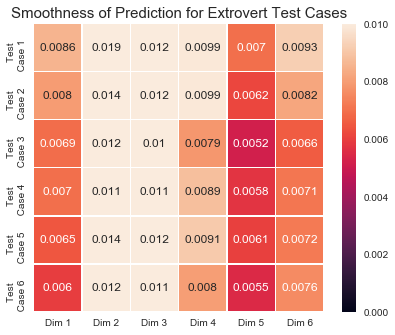

In [58]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(smoothness_prediction_300d, vmin=0, vmax=0.01, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Smoothness of Prediction for Extrovert Test Cases',size=15)
# plt.savefig("ExtroValidationSTD.pdf")
plt.show()

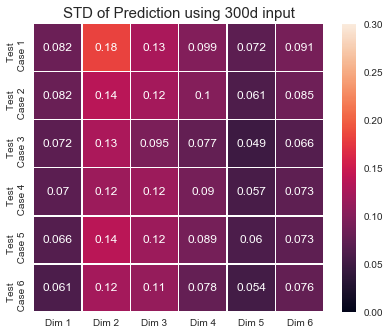

In [59]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()

sns.heatmap(std_prediction_300d, vmin=0, vmax=0.3, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('STD of Prediction using 300d input',size=15)
# plt.savefig("Wiki ExtroTestSTD.pdf")
plt.show()

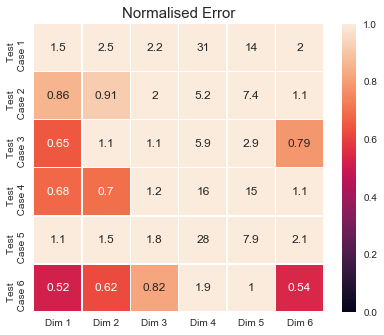

In [60]:
ylabels = ['Test \n Case 1', 'Test \n Case 2','Test \n Case 3','Test \n Case 4','Test \n Case 5','Test \n Case 6']
xlabels = ['Dim 1', 'Dim 2','Dim 3','Dim 4','Dim 5','Dim 6']

ax = plt.axes()
########## 100 is batch size
normalised_error_300d = errors_300d/(100 * std_ground_truth_300d**2)

sns.heatmap(normalised_error_300d, vmin=0, vmax=1, linewidths=.5, annot=True, xticklabels = xlabels, yticklabels = ylabels, ax= ax)
ax.set_title('Normalised Error',size=15)
# plt.savefig("ExtroTestSTD.pdf")
plt.show()

In [61]:
########## Producing CC maps for each Test case

CC_300d = []
CC_300d_mean = np.zeros((12,12))

for i in range(1,7):
    motion_transpose = np.load('data/Wiki/test{}_extro.npz'.format(i))['targets'].transpose()
    prediction_transpose = np.array(predictions_300d[i-1].transpose())
    pearson_correlation_coefficient = np.corrcoef(motion_transpose, prediction_transpose)
    CC_300d.append(pearson_correlation_coefficient)
    CC_300d_mean += pearson_correlation_coefficient

CC_300d_mean /= 6.0

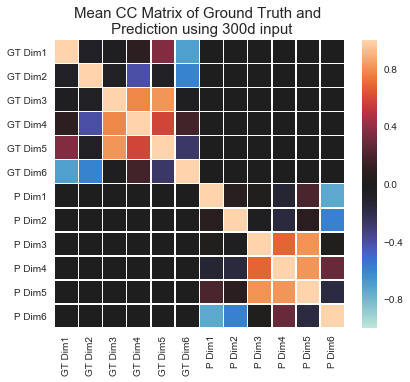

In [56]:
labels = ['GT Dim1', 'GT Dim2','GT Dim3','GT Dim4','GT Dim5','GT Dim6', 'P Dim1', 'P Dim2', 'P Dim3', 'P Dim4', 'P Dim5', 'P Dim6',]
ax = plt.axes()
sns.set(rc={'figure.figsize':(6.5,5.3)})

########## No annotation, or too messy
plot = sns.heatmap(CC_300d_mean, center=0, vmin = -1, vmax = 1, linewidths=.5, xticklabels = labels, yticklabels = labels, ax= ax)
ax.set_title('Mean CC Matrix of Ground Truth and \n Prediction using 300d input', size=15)
plt.savefig("baseline CC.pdf")
plt.show()

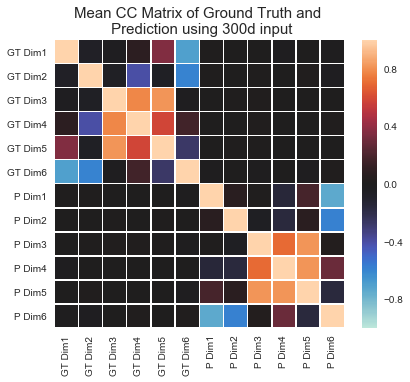

In [62]:
labels = ['GT Dim1', 'GT Dim2','GT Dim3','GT Dim4','GT Dim5','GT Dim6', 'P Dim1', 'P Dim2', 'P Dim3', 'P Dim4', 'P Dim5', 'P Dim6',]
ax = plt.axes()
sns.set(rc={'figure.figsize':(6.5,5.3)})

########## No annotation, or too messy
plot = sns.heatmap(CC_300d_mean, center=0, vmin = -1, vmax = 1, linewidths=.5, xticklabels = labels, yticklabels = labels, ax= ax)
ax.set_title('Mean CC Matrix of Ground Truth and \n Prediction using 300d input', size=15)
plt.savefig("smoothed baseline CC.pdf")
plt.show()

In [47]:
mean_std_groundtruth = np.mean(std_ground_truth_300d, axis = 0)
mean_std_300d = np.mean(std_prediction_300d, axis = 0)
print(np.round(mean_std_groundtruth, 3))
print(np.round(mean_std_300d, 3))

[ 0.151  0.16   0.119  0.084  0.062  0.103]
[ 0.074  0.138  0.118  0.091  0.061  0.078]


In [48]:
print(np.round(np.mean(normalised_error_300d, axis = 0), 3))

[  0.965   1.271   1.567  14.764   8.187   1.283]


In [49]:
print(np.round(np.mean(smoothness_ground_truth_300d, axis = 0), 3))
print(np.round(np.mean(smoothness_prediction_300d, axis = 0), 3))

[ 0.003  0.004  0.004  0.003  0.002  0.002]
[ 0.007  0.014  0.012  0.009  0.006  0.008]


In [ ]:
# output_100d = np.loadtxt("100d.txt")
# output_100d.shape

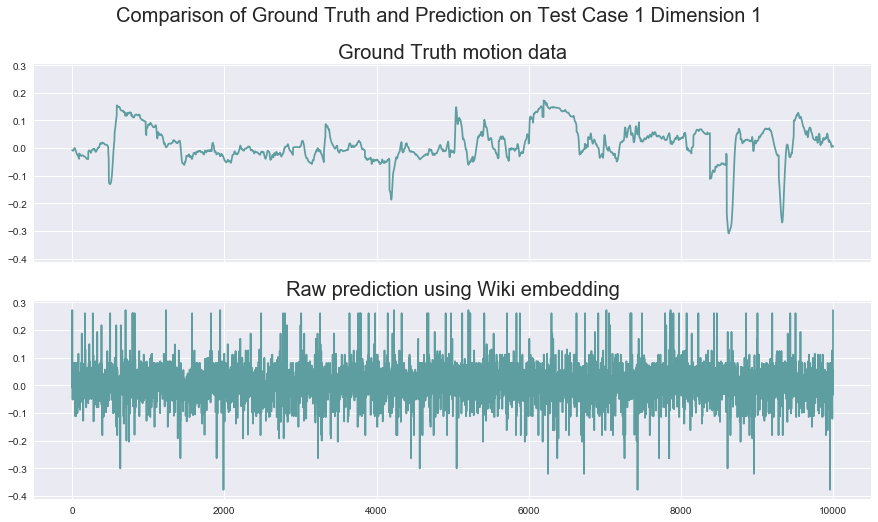

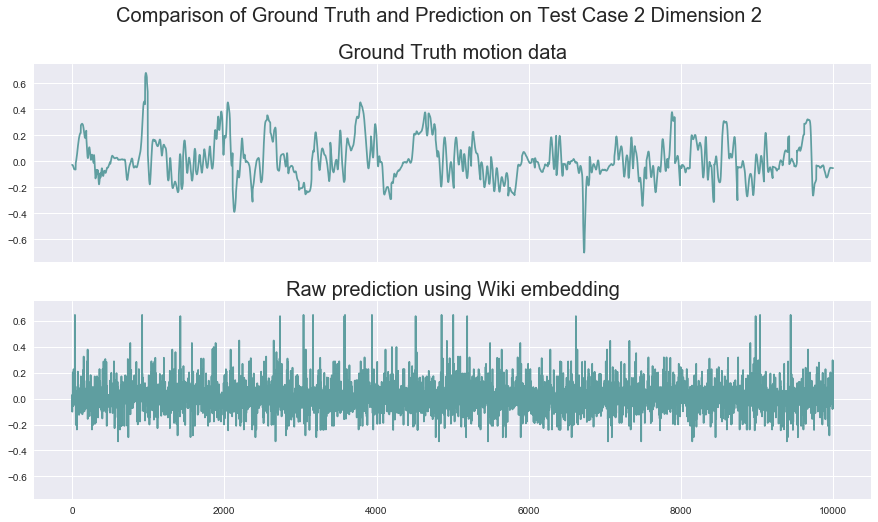

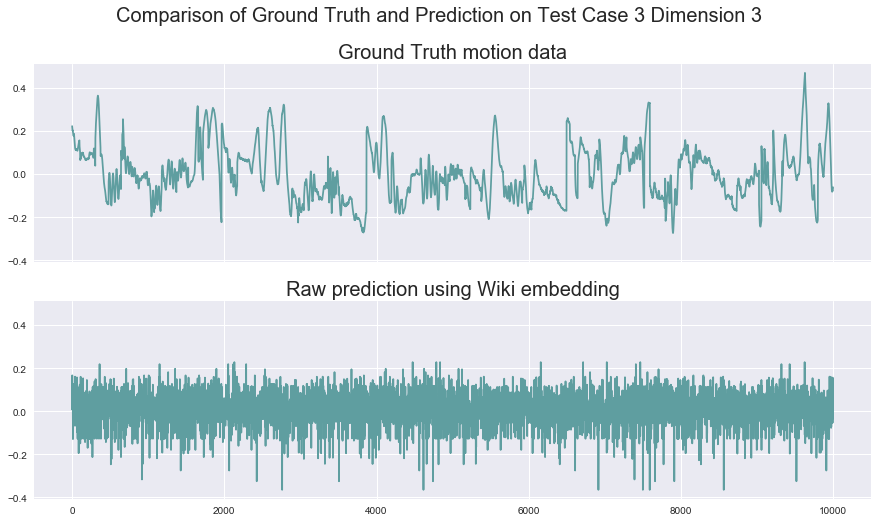

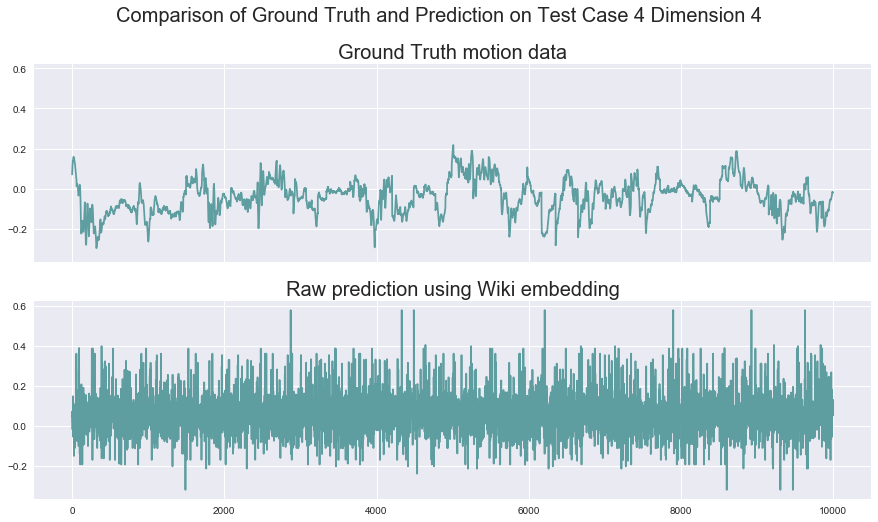

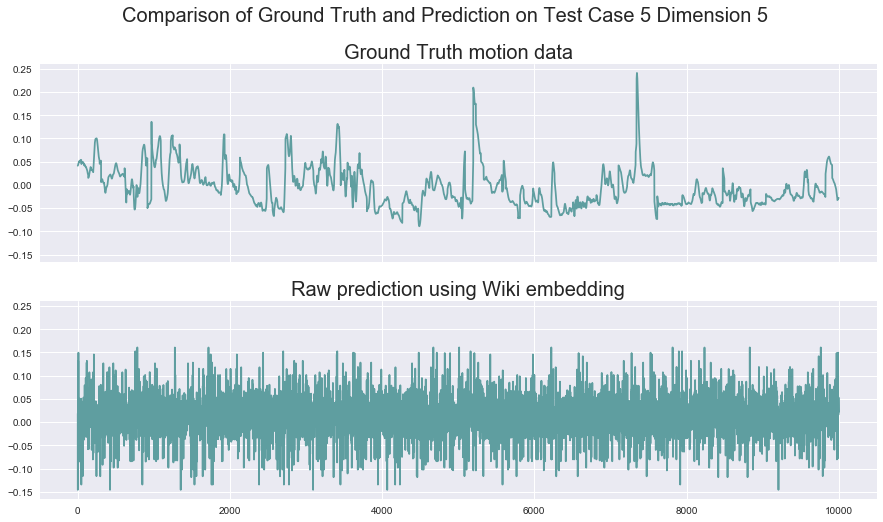

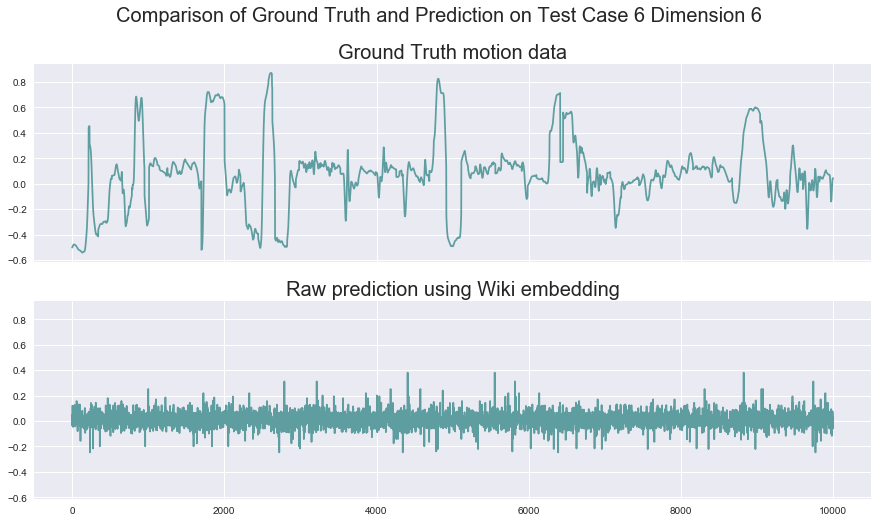

In [26]:
for i in range(1,7):
    motion_data_Wiki =  np.load('data/Wiki/test{}_extro.npz'.format(i))['targets']
    
    f, axarr = plt.subplots(2, sharex=True, sharey=True, figsize=(15,8))
    axarr[0].plot(motion_data_Wiki[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Ground Truth motion data', size = 20)

    axarr[1].plot(predictions_300d[i-1][:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction using Wiki embedding', size = 20)
#     axarr[2].plot(predictions_Twitter[i-1][:10000,i-1], color = 'cadetblue')
#     axarr[2].set_title('Raw prediction using Twitter embedding', size = 20)
    plt.suptitle("Comparison of Ground Truth and Prediction on Test Case {} Dimension {}".format(i, i), size=20)
#     plt.savefig("Case {} Dim {}.pdf".format(i, i-6))

In [29]:
def smooth_prediction(raw_prediction):
    output_shape = raw_prediction.shape
    # make a matrix that adds 20 lines paddings at the beginning & end of raw prediction
    calculation_frame = np.zeros((output_shape[0]+40, output_shape[1]))
    output = np.zeros(raw_prediction.shape)
    calculation_frame[20:-20, :] = raw_prediction

    for i in range(output_shape[0]):
        output[i,:] = calculation_frame[i+20,:] + \
        0.9 * (calculation_frame[i+21,:] + calculation_frame[i+19,:]) + \
        0.9 * (calculation_frame[i+22,:] + calculation_frame[i+18,:]) + \
        0.8 * (calculation_frame[i+23,:] + calculation_frame[i+17,:]) + \
        0.8 * (calculation_frame[i+24,:] + calculation_frame[i+16,:]) + \
        0.7 * (calculation_frame[i+25,:] + calculation_frame[i+15,:]) + \
        0.7 * (calculation_frame[i+26,:] + calculation_frame[i+14,:]) + \
        0.6 * (calculation_frame[i+27,:] + calculation_frame[i+13,:]) + \
        0.6 * (calculation_frame[i+28,:] + calculation_frame[i+12,:]) + \
        0.5 * (calculation_frame[i+29,:] + calculation_frame[i+11,:]) + \
        0.5 * (calculation_frame[i+30,:] + calculation_frame[i+10,:]) + \
        0.4 * (calculation_frame[i+31,:] + calculation_frame[i+9,:]) + \
        0.4 * (calculation_frame[i+32,:] + calculation_frame[i+8,:]) + \
        0.3 * (calculation_frame[i+33,:] + calculation_frame[i+7,:]) + \
        0.3 * (calculation_frame[i+34,:] + calculation_frame[i+6,:]) + \
        0.2 * (calculation_frame[i+35,:] + calculation_frame[i+5,:]) + \
        0.2 * (calculation_frame[i+36,:] + calculation_frame[i+4,:]) + \
        0.1 * (calculation_frame[i+37,:] + calculation_frame[i+3,:]) + \
        0.1 * (calculation_frame[i+38,:] + calculation_frame[i+2,:]) + \
        0.1 * (calculation_frame[i+39,:] + calculation_frame[i+1,:])
    output /= [2.0, 2.0, 2.0, 3.0, 2.0, 2.0]

    # Adjust motion to origin
#     motion_mean = np.mean(output,axis=0)
#     output = output - motion_mean

    return output

Error:    3.71226862997
Motion length:  31467


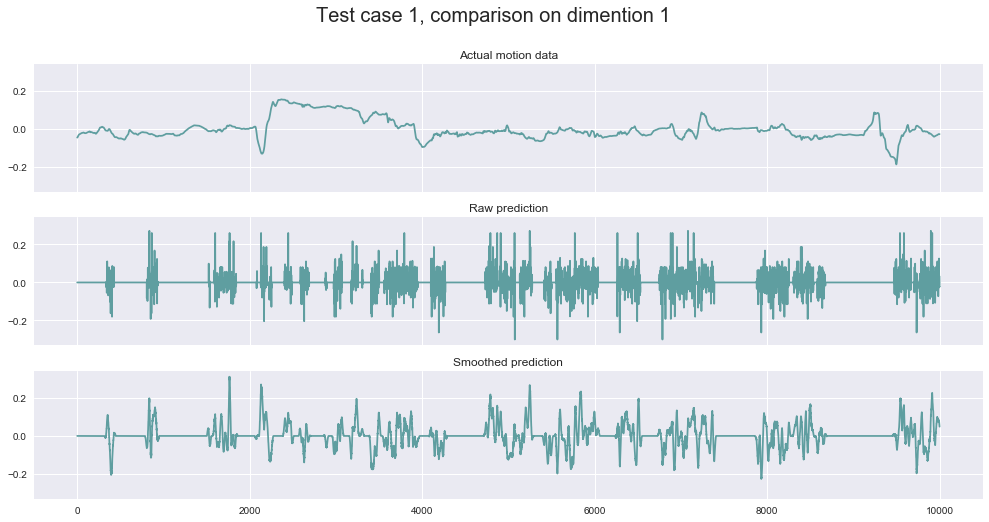

Error:    5.03490339009
Motion length:  31983


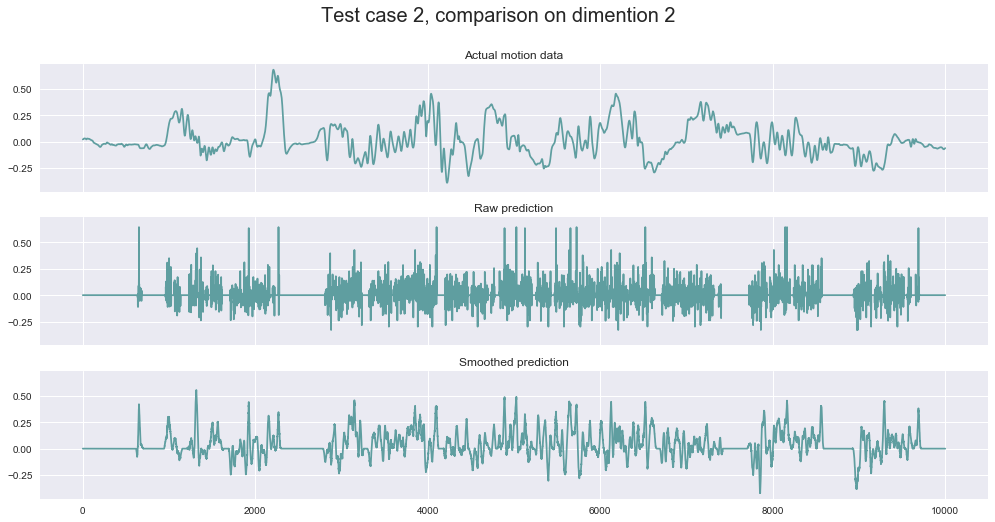

Error:    4.43510251877
Motion length:  35331


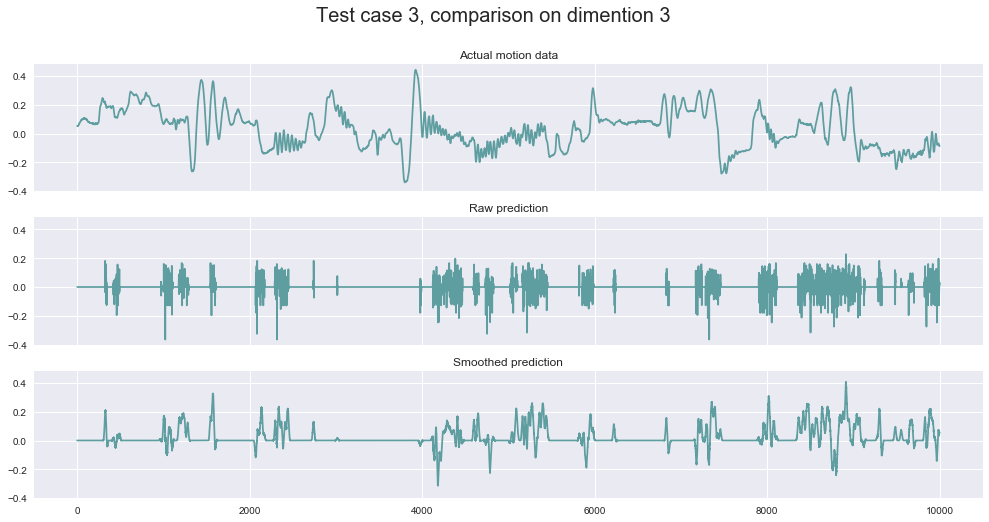

Error:    5.32280722281
Motion length:  30155


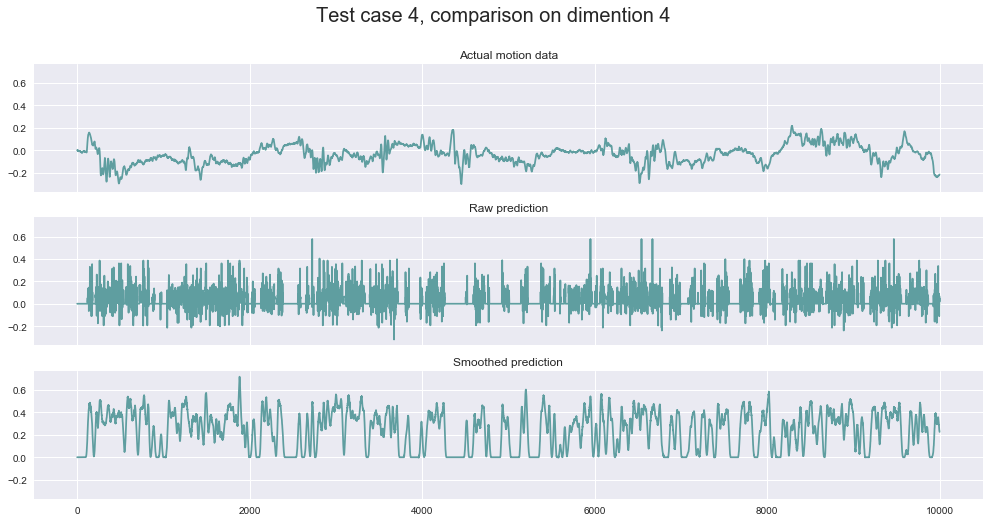

Error:    2.99609626963
Motion length:  31798


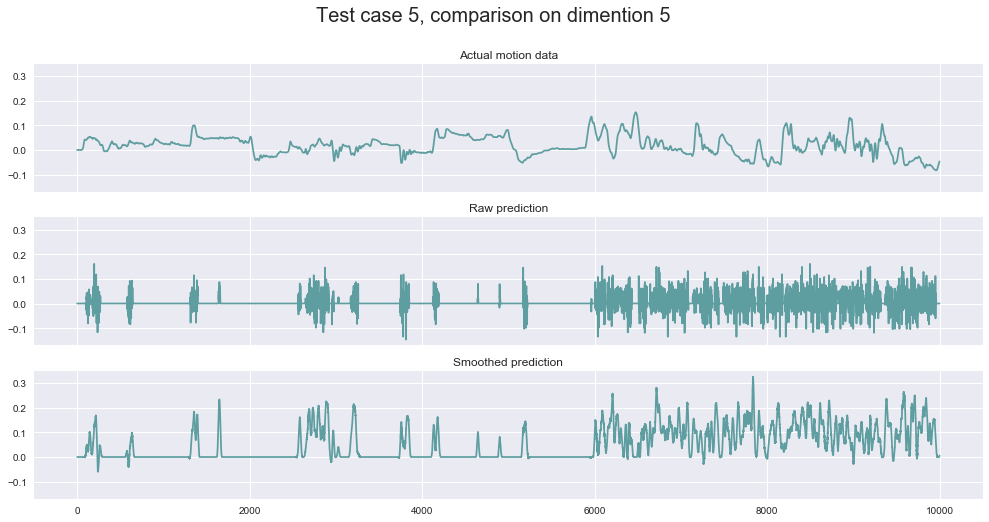

Error:    38.3259680673
Motion length:  34518


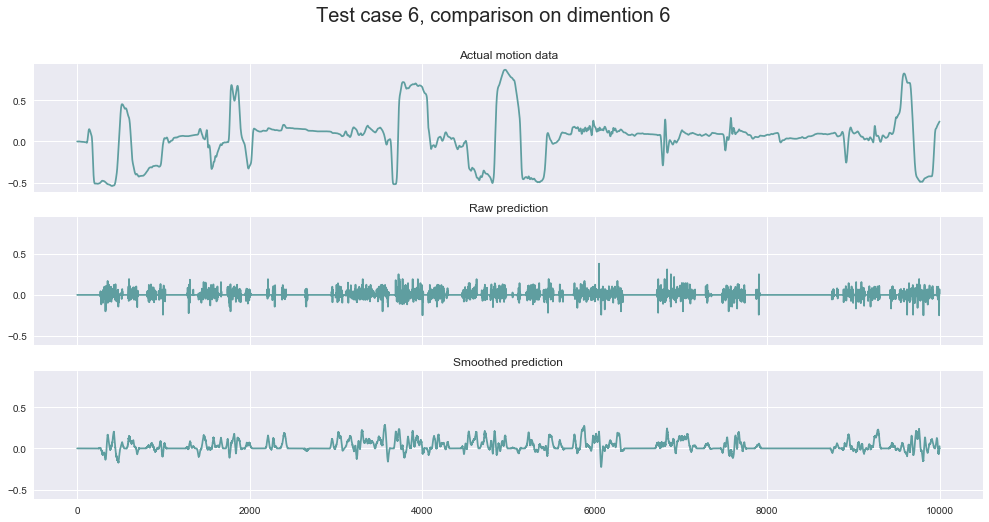

In [30]:
# Loop over 1-6 test cases

for i in range(1,7):
    test_data = HMS300dDataProvider('test{0}'.format(i), rng=rng)
    result, evaluation = optimiser_300d.eval_test_set(test_data, 'test')
    print('Error:    ' + str(evaluation['errortest']))
    
    time_intervals = np.loadtxt("ExtrovertRawData/Words/{0}".format(i), usecols=range(4, 6), dtype="int")
    prediction = np.zeros((time_intervals[-1,1] + 300, 6))
    counter = 0
    for line in time_intervals:
        for j in range(line[0], line[1]):
            prediction[j] = result[-1][counter]
            counter += 1
    prediction_smooth = smooth_prediction(prediction)

#     np.savetxt('Predictions/300dL2/fake_extro_L2_{0}.txt'.format(i), prediction, fmt="%.7f")
#     np.savetxt('Predictions/300dL2/fake_extro_L2_smooth_{0}.txt'.format(i), prediction_smooth, fmt="%.7f")
    
    motion_data = np.loadtxt("ExtrovertRawData/Motion/{0}.rov".format(i), skiprows=17, usecols=range(0, 6))
    print("Motion length: ", motion_data.shape[0])

    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(3, sharex=True, sharey=True, figsize=(17,8))
    axarr[0].plot(motion_data[:10000,i-1], color = 'cadetblue')
    axarr[0].set_title('Actual motion data')
    axarr[1].plot(prediction[:10000,i-1], color = 'cadetblue')
    axarr[1].set_title('Raw prediction')
    axarr[2].plot(prediction_smooth[:10000,i-1], color = 'cadetblue')
    axarr[2].set_title('Smoothed prediction')
    plt.suptitle('Test case {0}, comparison on dimention {1}'.format(i, i), size = 20)
#     plt.savefig('Predictions/300dL2/L2 fake_extro case {0} dim {1}.pdf'.format(i, i))
    plt.show()